In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from IndustryMap2 import industry_categories

In [2]:
df = pd.read_csv('./dataset2_cleaned.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Remove capitalization and spaces from 'Third Party Name' column
df['Third Party Name'] = df['Third Party Name'].str.lower().str.replace(' ', '')

In [3]:
training_transactions, testing_transactions = train_test_split(df, test_size=0.2, random_state=2)

## Remove certain industries

In [4]:
training_transactions

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime
98763,01/06/2023,11:43:00,660561861.0,1069.557925,-12.99,NaN,sportsdirect,2023-06-01 11:43:00
202021,31/10/2023,23:59:00,229205098.0,8430.205394,-7.00,NaN,xbox,2023-10-31 23:59:00
9195,08/01/2023,10:59:00,191161970.0,1174.555000,-52.39,NaN,tesco,2023-01-08 10:59:00
187042,11/10/2023,08:32:00,519933553.0,-354.791496,-18.22,NaN,tesco,2023-10-11 08:32:00
138671,01/08/2023,09:57:00,762700245.0,1756.224700,-38.97,NaN,sportsdirect,2023-08-01 09:57:00
...,...,...,...,...,...,...,...,...
175638,30/09/2023,08:26:00,973086490.0,8501.682677,-39.28,NaN,cooplocal,2023-09-30 08:26:00
95816,31/05/2023,23:59:00,737645298.0,-1415.637550,-18.99,NaN,puregym,2023-05-31 23:59:00
203245,01/11/2023,03:41:00,304455868.0,3349.715880,-14.48,NaN,topshop,2023-11-01 03:41:00
100879,05/06/2023,08:23:00,198630866.0,-222.556324,-61.23,NaN,tesco,2023-06-05 08:23:00


In [5]:
# Find all keys in the dictionary where the value is 'subscription' or 'finance'
companies_to_remove = [company for company, category in industry_categories.items()
                       if category in ['subscription', 'finance']]
companies_to_remove.append('grandunionbjj')
training_transactions = training_transactions[~((training_transactions['Third Party Name'] == 'amazon') & (training_transactions['Amount'] == -7.99))]
testing_transactions = testing_transactions[~((testing_transactions['Third Party Name'] == 'amazon') & (testing_transactions['Amount'] == -7.99))]

training_transactions = training_transactions[~training_transactions['Third Party Name'].isin(companies_to_remove)]
testing_transactions = testing_transactions[~testing_transactions['Third Party Name'].isin(companies_to_remove)]



In [6]:
testing_transactions[testing_transactions['Third Party Name'] == 'amazon']

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime
55126,28/03/2023,08:55:00,905860285.0,6720.051838,-9.60,NaN,amazon,2023-03-28 08:55:00
153121,29/08/2023,19:52:00,414805878.0,11699.926168,-5.89,NaN,amazon,2023-08-29 19:52:00
208194,08/11/2023,19:19:00,859603181.0,3724.759408,-7.58,NaN,amazon,2023-11-08 19:19:00
142872,08/08/2023,17:33:00,815993333.0,1462.477842,-37.00,NaN,amazon,2023-08-08 17:33:00
47910,08/03/2023,17:14:00,522188082.0,5236.474130,-33.84,NaN,amazon,2023-03-08 17:14:00
...,...,...,...,...,...,...,...,...
183012,04/10/2023,02:52:00,873693307.0,10069.391632,-5.83,NaN,amazon,2023-10-04 02:52:00
142051,07/08/2023,02:07:00,815385232.0,8250.566744,-42.17,NaN,amazon,2023-08-07 02:07:00
191146,19/10/2023,04:41:00,305778936.0,9324.831923,-3.50,NaN,amazon,2023-10-19 04:41:00
209064,10/11/2023,14:52:00,970298834.0,2858.103792,-11.78,NaN,amazon,2023-11-10 14:52:00


In [7]:
training_payments_df = training_transactions[training_transactions['Amount'] > 0].copy()
training_expenditures_df = training_transactions[training_transactions['Amount'] < 0].copy()
training_expenditures_df["Amount"] = training_expenditures_df["Amount"].abs()

testing_payments_df = testing_transactions[testing_transactions['Amount'] > 0].copy()
testing_expenditures_df = testing_transactions[testing_transactions['Amount'] < 0].copy()
testing_expenditures_df["Amount"] = testing_expenditures_df["Amount"].abs()

In [8]:
training_expenditures_df = training_expenditures_df.copy()
testing_expenditures_df = testing_expenditures_df.copy()

training_expenditures_df['DayOfWeek'] = training_expenditures_df['Datetime'].dt.dayofweek
training_expenditures_df['DayOfMonth'] = training_expenditures_df['Datetime'].dt.day
training_expenditures_df['MonthOfYear'] = training_expenditures_df['Datetime'].dt.month

testing_expenditures_df['DayOfWeek'] = testing_expenditures_df['Datetime'].dt.dayofweek
testing_expenditures_df['DayOfMonth'] = testing_expenditures_df['Datetime'].dt.day
testing_expenditures_df['MonthOfYear'] = testing_expenditures_df['Datetime'].dt.month

In [9]:
training_expenditures_df = training_expenditures_df.copy()
testing_expenditures_df = testing_expenditures_df.copy()

training_expenditures_df['Hour'] = training_expenditures_df['Datetime'].dt.hour
testing_expenditures_df['Hour'] = testing_expenditures_df['Datetime'].dt.hour

In [10]:
patterns_train = training_expenditures_df.groupby(['Account No', 'Hour', 'DayOfWeek', 'DayOfMonth', 'MonthOfYear', 'Third Party Name'])['Amount'].sum().reset_index()
patterns_test = testing_expenditures_df.groupby(['Account No', 'Hour', 'DayOfWeek', 'DayOfMonth', 'MonthOfYear', 'Third Party Name'])['Amount'].sum().reset_index()

In [11]:
account_no = list(df['Account No'].unique())
key_list = account_no
value_list = [0] * len(account_no)
account_num_models = dict(zip(key_list, value_list))

In [12]:
for account in account_no:
    X_train = patterns_train[patterns_train['Account No'] == account][['Hour', 'DayOfWeek', 'DayOfMonth', 'MonthOfYear', 'Amount']]
    X_test = patterns_test[patterns_test['Account No'] == account][['Hour', 'DayOfWeek', 'DayOfMonth', 'MonthOfYear', 'Amount']]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    user_model = IsolationForest(n_estimators=100, contamination=0.01)
    account_num_models[account] = user_model.fit(X_train_scaled)
    
    predictions = account_num_models[account].predict(X_test_scaled)
    
    # Save predictions to the DataFrame
    patterns_test.loc[X_test.index, 'Prediction'] = predictions
    
# Check the DataFrame to see the predictions column
print(patterns_test.head())

    Account No  Hour  DayOfWeek  DayOfMonth  MonthOfYear Third Party Name  \
0  101531259.0     8          0          19            6            tesco   
1  101531259.0     8          2          11           10            tesco   
2  101531259.0     8          5          12            8            tesco   
3  101531259.0     9          3          30           11    fivesensesart   
4  101531259.0     9          5          30            9     sportsdirect   

   Amount  Prediction  
0  161.08         1.0  
1   65.20         1.0  
2   95.92         1.0  
3    7.49         1.0  
4   30.99         1.0  


In [13]:
anomaly_tx = patterns_test[patterns_test['Prediction'] == -1].head(60)
anomaly_tx.head()

,Account No,Hour,DayOfWeek,DayOfMonth,MonthOfYear,Third Party Name,Amount,Prediction
184,108563213.0,10,6,2,7,matalan,333.16,-1.0
203,108563213.0,19,1,31,1,tesco,64.36,-1.0
272,108931112.0,20,2,1,2,tesco,120.02,-1.0
274,108931112.0,21,5,1,4,deliveroo,32.82,-1.0
549,117273481.0,14,6,22,10,sainsbury,237.41,-1.0


In [15]:
patterns_test[patterns_test['Account No'] == 108563213.0]

,Account No,Hour,DayOfWeek,DayOfMonth,MonthOfYear,Third Party Name,Amount,Prediction
135,108563213.0,2,0,28,8,fatface,47.83,1.0
136,108563213.0,3,0,4,9,cooplocal,48.75,1.0
137,108563213.0,3,2,18,10,cooplocal,44.90,1.0
138,108563213.0,3,3,16,11,etsy,30.34,1.0
139,108563213.0,4,1,5,12,selfridges,62.90,1.0
...,...,...,...,...,...,...,...,...
199,108563213.0,18,1,18,7,matalan,7.06,1.0
200,108563213.0,18,2,20,9,matalan,3.73,1.0
201,108563213.0,18,3,9,11,topshop,8.12,1.0
202,108563213.0,19,0,2,10,tesco,103.00,1.0


In [16]:
import matplotlib.pyplot as plt

account = 678330503.0

# Predict on the test dataset
predictions = account_num_models[account].predict(X_test_scaled)

print(X_test_scaled)
print(predictions)

# Analyze predictions
#n_outliers = (predictions == -1).sum()
#n_inliers = (predictions == 1).sum()

#print(f"Number of outliers detected: {n_outliers}")
#print(f"Number of inliers detected: {n_inliers}")

# Plot results (if feasible)
#plt.figure(figsize=(10, 6))
#plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=predictions, cmap='coolwarm', edgecolor='k', s=50)
#plt.title('Isolation Forest Outlier Detection')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
#plt.show()

[[-2.60570071 -1.07728219  0.04237145 -0.12038774 -0.86261257]
 [-2.10213777  0.43186202  0.48055425  1.36346115 -0.78400766]
 [-1.59857482 -1.07728219 -0.50535705  0.47315182 -0.11012519]
 [-1.59857482 -1.07728219  0.04237145 -0.12038774 -0.25541177]
 [-1.09501188 -1.07728219 -0.61490276 -1.30746685  0.1861888 ]
 [-0.59144893 -1.07728219 -1.16263126  1.06669137 -0.87210698]
 [-0.59144893 -1.07728219  0.37100855  1.06669137  0.05238383]
 [-0.08788599 -0.57423412  1.02828276  1.36346115  0.58583732]
 [ 0.41567696 -0.07118605 -0.39581135  1.36346115 -0.95954389]
 [ 0.41567696 -0.07118605  0.04237145 -1.01069708  0.62977658]
 [ 0.41567696 -0.07118605  0.37100855  1.36346115  0.54211887]
 [ 0.41567696  0.9349101  -0.50535705 -1.01069708 -1.02578398]
 [ 0.41567696  0.9349101   1.68555696  0.17638204 -0.33048387]
 [ 0.41567696  1.43795817  0.37100855 -1.01069708 -0.34218629]
 [ 0.41567696  1.43795817  1.02828276  0.17638204  0.10073909]
 [ 0.41567696  1.43795817  1.35691986 -0.12038774  0.72

In [17]:
# Calculate Q1 and Q3
business_groups = anomaly_tx.groupby('Third Party Name')['Amount']
iqr_dict = {name: {'Q1': group.quantile(0.25), 'Q3': group.quantile(0.75), 'IQR': group.quantile(0.75) - group.quantile(0.25)} 
            for name, group in business_groups}

In [22]:
iqr_dict

{'boots': {'Q1': 21.47, 'Q3': 21.47, 'IQR': 0.0},
 'cooplocal': {'Q1': 40.02, 'Q3': 40.02, 'IQR': 0.0},
 'deliveroo': {'Q1': 22.95, 'Q3': 25.78, 'IQR': 2.830000000000002},
 'fatface': {'Q1': 232.37, 'Q3': 269.675, 'IQR': 37.30500000000001},
 'gamestation': {'Q1': 149.97, 'Q3': 149.97, 'IQR': 0.0},
 'hobbylobby': {'Q1': 40.97, 'Q3': 40.97, 'IQR': 0.0},
 'justeat': {'Q1': 22.21, 'Q3': 25.33, 'IQR': 3.1199999999999974},
 'mamas&papas': {'Q1': 190.0, 'Q3': 190.0, 'IQR': 0.0},
 'matalan': {'Q1': 230.4825,
  'Q3': 335.09499999999997,
  'IQR': 104.61249999999998},
 'revella': {'Q1': 179.99, 'Q3': 221.9, 'IQR': 41.91},
 'sainsbury': {'Q1': 237.41, 'Q3': 237.41, 'IQR': 0.0},
 'sainsburylocal': {'Q1': 30.25, 'Q3': 68.33, 'IQR': 38.08},
 'sportsdirect': {'Q1': 173.67000000000002,
  'Q3': 257.87,
  'IQR': 84.19999999999999},
 'tesco': {'Q1': 68.605, 'Q3': 135.83999999999997, 'IQR': 67.23499999999997},
 'thecrown': {'Q1': 5.2, 'Q3': 5.2, 'IQR': 0.0},
 'theworks': {'Q1': 21.97, 'Q3': 21.97, 'IQR': 0

In [25]:
#Function to categorize the anomaly transactions
def tx_risk_category(row):
    business = row['Third Party Name']
    amount = row['Amount']
    if business in iqr_dict:
        q1 = iqr_dict[business]['Q1']
        q3 = iqr_dict[business]['Q3']
        iqr = iqr_dict[business]['IQR']
        medium_risk = q3 + 1.5 * iqr
        high_risk = q3 + 3 * iqr 
        
        if amount > high_risk:
            return 'High Risk'
        elif amount > medium_risk:
            return 'Medium Risk'
        else:
            return 'No Risk'
    else:
        return 'Unknown'

anomaly_tx['Risk Category'] = anomaly_tx.apply(tx_risk_category, axis=1)

In [28]:
anomaly_tx.head(10)

,Account No,Hour,DayOfWeek,DayOfMonth,MonthOfYear,Third Party Name,Amount,Prediction,Risk Category
184,108563213.0,10,6,2,7,matalan,333.16,-1.0,No Risk
203,108563213.0,19,1,31,1,tesco,64.36,-1.0,No Risk
272,108931112.0,20,2,1,2,tesco,120.02,-1.0,No Risk
274,108931112.0,21,5,1,4,deliveroo,32.82,-1.0,Medium Risk
549,117273481.0,14,6,22,10,sainsbury,237.41,-1.0,No Risk
666,120634201.0,7,6,3,12,revella,49.50,-1.0,No Risk
735,121858569.0,8,1,31,1,tesco,150.54,-1.0,No Risk
757,122884111.0,5,0,1,5,deliveroo,24.89,-1.0,No Risk
820,124102251.0,15,6,3,12,revella,221.90,-1.0,No Risk
863,124377686.0,3,5,27,5,deliveroo,25.78,-1.0,No Risk


In [30]:
anomaly_tx[anomaly_tx['Risk Category'] == 'High Risk']

,Account No,Hour,DayOfWeek,DayOfMonth,MonthOfYear,Third Party Name,Amount,Prediction,Risk Category
2044,154246234.0,10,0,3,7,topshop,312.2,-1.0,High Risk


In [31]:
anomaly_tx[anomaly_tx['Risk Category'] == 'Medium Risk']

,Account No,Hour,DayOfWeek,DayOfMonth,MonthOfYear,Third Party Name,Amount,Prediction,Risk Category
274,108931112.0,21,5,1,4,deliveroo,32.82,-1.0,Medium Risk
1206,134847904.0,9,0,31,7,tesco,276.79,-1.0,Medium Risk
1228,134847904.0,20,1,31,1,tesco,291.03,-1.0,Medium Risk


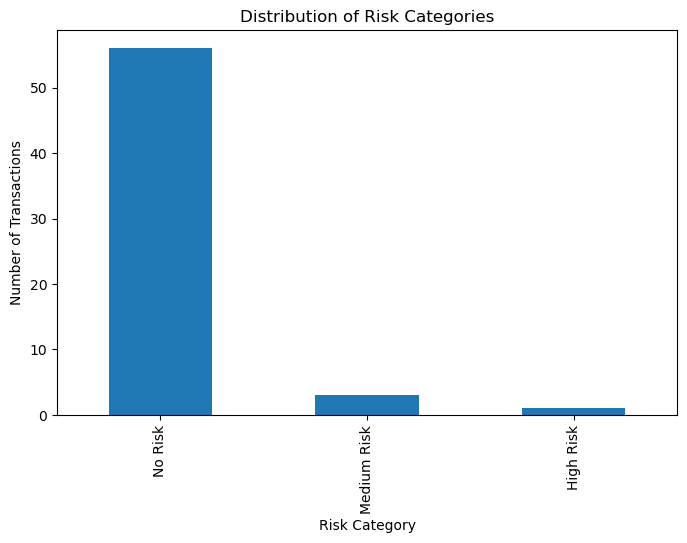

In [27]:
import matplotlib.pyplot as plt

no_of_risk = anomaly_tx['Risk Category'].value_counts()
plt.figure(figsize=(8, 5))
no_of_risk.plot(kind='bar')
plt.title('Distribution of Risk Categories')
plt.xlabel('Risk Category')
plt.ylabel('Number of Transactions')
plt.show()